# Clothes-Size-Prediction
## 1. Problem Definition

Context

The best way to avoid mistakes in buying clothes through online shops. You can check your predictions using this dataset.

Context

The best way to avoid mistakes in buying clothes through online shops. You can check your predictions using this dataset

Inspiration


The most important motivation behind this was to get the size predicted to avoid any problems while buying clothes.
Content

##  2. Data

Data available on Kaggle.  https://www.kaggle.com/tourist55/clothessizeprediction


## 3. Evaluation
> If we can reach 80% () accuracy at predicting the size of a person during the proof of concept, we'll pursue the project.

## 4. Features

The Dataset consists of 4 columns:
The output parameter is size and input parameters are Weight, Age, and Height.

* Weight (in kgs)
* Age
* Height (in cm)
* Size (Target)


# Preparing the tools



In [40]:

# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix


plt.style.use('ggplot')

# Load data

In [2]:
df = pd.read_csv('data/final_test.csv')
df.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [3]:
df.isna().sum()

weight      0
age       257
height    330
size        0
dtype: int64

### replace NaN with mean

In [4]:
df['age'].fillna(df['age'].mean(), inplace=True)
df['height'].fillna(df['height'].mean(), inplace=True)
df.isna().sum()

weight    0
age       0
height    0
size      0
dtype: int64

In [5]:
df['size'].value_counts()

M       29712
S       21924
XXXL    21359
XL      19119
L       17587
XXS      9964
XXL        69
Name: size, dtype: int64

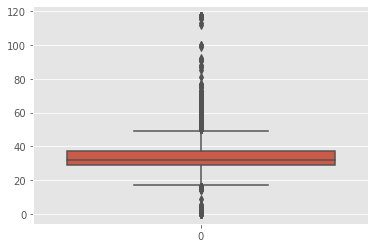

In [6]:
sns.boxplot(data=df['age']);

Text(0, 0.5, 'Amount')

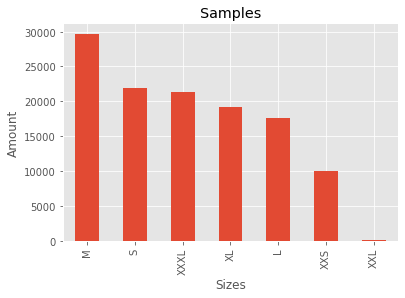

In [7]:
df['size'].value_counts().plot(kind='bar')
plt.title('Samples')
plt.xlabel('Sizes')
plt.ylabel('Amount')

In [8]:
list(df['size'].unique())

['XL', 'L', 'M', 'S', 'XXS', 'XXXL', 'XXL']

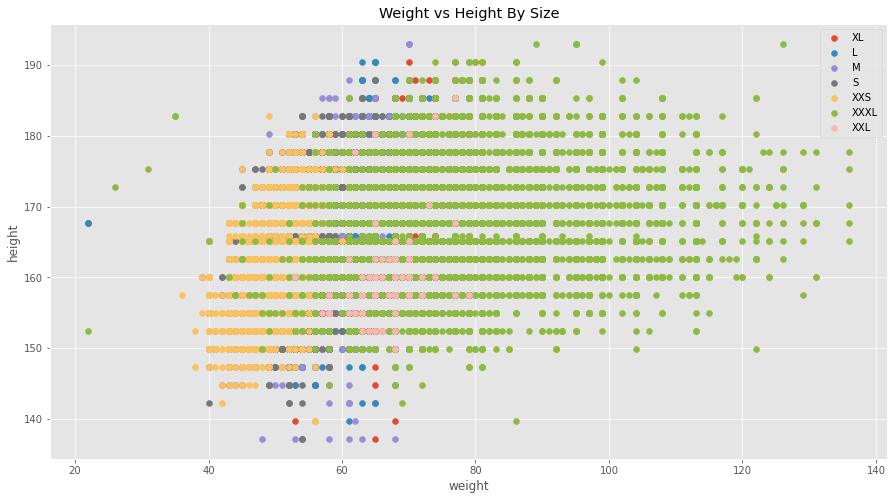

In [9]:
# if i want to graph all the targets values, I need to do a for to iter them and graph
fig, ax = plt.subplots(figsize=(15,8))
for k in list(df['size'].unique()):
    series = df[df['size'] == k]
    scat = ax.scatter(series['weight'], series['height'], label=k)
plt.xlabel('weight')
plt.ylabel('height')
plt.title('Weight vs Height By Size')
plt.legend()

In [10]:
df['age'].value_counts()

30.0    8816
31.0    8777
29.0    8358
32.0    8268
28.0    7302
        ... 
81.0       1
92.0       1
1.0        1
9.0        1
85.0       1
Name: age, Length: 83, dtype: int64

<AxesSubplot:ylabel='Frequency'>

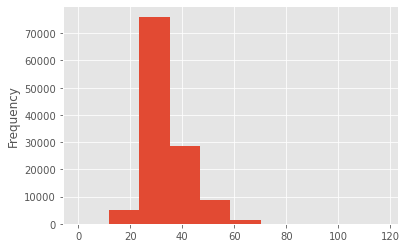

In [11]:
df['age'].plot.hist()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119734 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119734 non-null  int64  
 1   age     119734 non-null  float64
 2   height  119734 non-null  float64
 3   size    119734 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB


In [13]:
df.describe()

,weight,age,height
count,119734.000000,119734.000000,119734.000000
mean,61.756811,34.027311,165.805794
std,9.944863,8.140696,6.728360
min,22.000000,0.000000,137.160000
25%,55.000000,29.000000,160.020000
50%,61.000000,32.000000,165.100000
75%,67.000000,37.000000,170.180000
max,136.000000,117.000000,193.040000


In [14]:
corr_matrix = df.corr()
corr_matrix

,weight,age,height
weight,1.000000,0.067878,0.387792
age,0.067878,1.000000,-0.003036
height,0.387792,-0.003036,1.000000


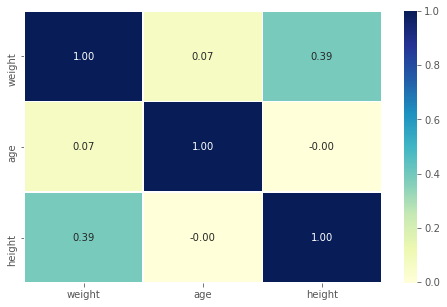

In [15]:
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");


# 5. Modelling

In [16]:
df.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [17]:
X = df.drop('size', axis=1)
y = df['size']

In [18]:
models = {
    'LogisticRegresion': LogisticRegression(),
    'KNN' : KNeighborsClassifier(),
    'RandomForestClassifier': RandomForestClassifier()
}

In [19]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2)
baseline_models_score = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    baseline_models_score[name] = score
    print(f'Model {name} with score: {score}')

D:\Learning\ml\size-prediction-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model LogisticRegresion with score: 0.49286967052240366
Model KNN with score: 0.46242744393869795
Model RandomForestClassifier with score: 0.4814068568087861


In [20]:
baseline_models_score

{'LogisticRegresion': 0.49286967052240366,
 'KNN': 0.46242744393869795,
 'RandomForestClassifier': 0.4814068568087861}

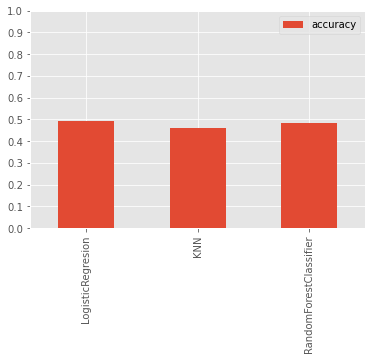

In [21]:
model_compare = pd.DataFrame(baseline_models_score, index=["accuracy"])
model_compare.T.plot.bar();
plt.yticks(np.arange(0,1.1,0.1));

    # Tunning models

In [29]:
# LOGISTIC REGRESSION GRID
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 200, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": [2,4],
           "min_samples_leaf": [2,4,]}

# 1. LogisticRegression

## RandomizedSearchCV

In [23]:

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rs_log_reg.fit(X_train, y_train)

rs_log_reg.score(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.46964129118469955

## GridSearchCV

In [24]:
np.random.seed(42)
grid_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True)
grid_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [25]:
grid_log_reg.score(X_test, y_test)

0.46964129118469955

# KNN tunning

In [26]:
neighbors = range(1, 21)
params = {'n_neighbors': neighbors}
rs_knn = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=params, verbose=True)
rs_knn.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': range(1, 21)},
                   verbose=True)

In [27]:
rs_knn.best_params_

{'n_neighbors': 20}

In [30]:
rs_knn.score(X_test, y_test)

0.49547960078506703

## RANDOM FOREST CLASSIFIER

## RandomSearchCV

In [31]:
rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, verbose=True)
rs_rf.fit(X_train, y_train)
rs_rf.score(X_test, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


0.5128930554975571

In [32]:
rs_rf.best_params_

{'n_estimators': 110,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_depth': 10}

## GridSearchCVC

In [33]:
gs_rf = GridSearchCV(RandomForestClassifier(), param_grid=rf_grid, verbose=True)
gs_rf.fit(X_train, y_train)
gs_rf.score(X_test, y_test)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


0.5133837223869379

In [34]:
gs_rf.best_params_

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 60}

### USING GS_RF FOR METRICS

In [35]:
y_preds =gs_rf.predict(X_test)

In [36]:
confusion_matrix(y_test, y_preds)

array([[ 2684,  6502,   472,  3595,     0,    32,   761],
       [ 1943, 15173,  4517,  1476,     0,   345,   240],
       [  244,  6209,  9014,   135,     0,  1846,    54],
       [ 2226,  3440,   221,  6204,     0,    16,  3186],
       [    7,     5,     1,    16,     0,     0,    28],
       [   18,   737,  4266,    14,     0,  3004,    11],
       [  502,   472,    48,  3011,     0,    16, 13097]], dtype=int64)

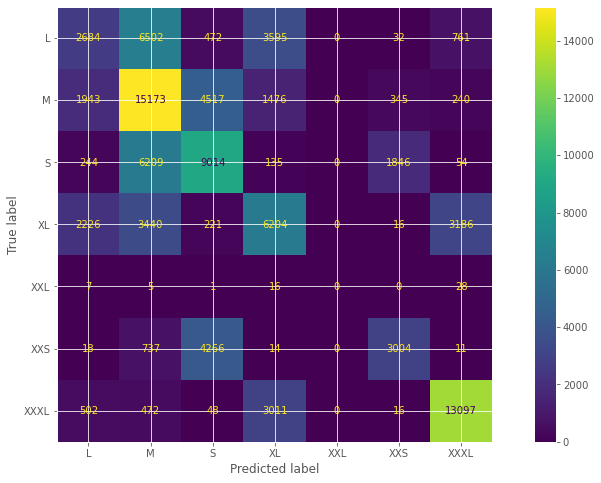

In [43]:
fig, ax = plt.subplots(figsize=(15,8))
plot_confusion_matrix(gs_rf, X_test, y_test, ax=ax)

In [46]:
print(classification_report(y_test,y_preds, zero_division=False))

              precision    recall  f1-score   support

           L       0.35      0.19      0.25     14046
           M       0.47      0.64      0.54     23694
           S       0.49      0.52      0.50     17502
          XL       0.43      0.41      0.42     15293
         XXL       0.00      0.00      0.00        57
         XXS       0.57      0.37      0.45      8050
        XXXL       0.75      0.76      0.76     17146

    accuracy                           0.51     95788
   macro avg       0.44      0.41      0.42     95788
weighted avg       0.51      0.51      0.50     95788

